In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                            recall_score, f1_score, precision_score, recall_score)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("diabetes_dataset.csv")
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [5]:
data.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
data.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

In [8]:
data.isnull().any()

year                    False
gender                  False
age                     False
location                False
race:AfricanAmerican    False
race:Asian              False
race:Caucasian          False
race:Hispanic           False
race:Other              False
hypertension            False
heart_disease           False
smoking_history         False
bmi                     False
hbA1c_level             False
blood_glucose_level     False
diabetes                False
dtype: bool

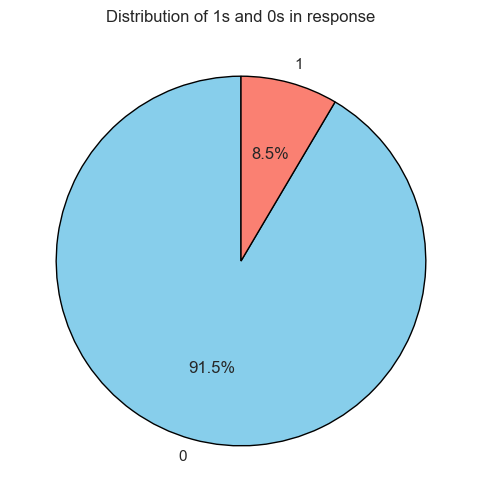

In [9]:
# Assuming data_original is your DataFrame and 'response' is the column
counts = data['diabetes'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'})

# Adding a title
plt.title('Distribution of 1s and 0s in response')

# Display the plot
plt.show()

In [10]:
# Checking skewness of continuous variables in the training data
skewness = data[['age','race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level']].skew()

# Display skewness
skewness

age                    -0.051979
race:AfricanAmerican    1.482709
race:Asian              1.498851
race:Caucasian          1.509744
race:Hispanic           1.508800
race:Other              1.500179
hypertension            3.231296
heart_disease           4.733872
bmi                     1.043836
hbA1c_level            -0.066854
blood_glucose_level     0.821655
dtype: float64

age                    -0.051979
race:AfricanAmerican    1.482709
race:Asian              1.498851
race:Caucasian          1.509744
race:Hispanic           1.508800
race:Other              1.500179
hypertension            3.231296
heart_disease           4.733872
bmi                     1.043836
hbA1c_level            -0.066854
blood_glucose_level     0.821655
dtype: float64


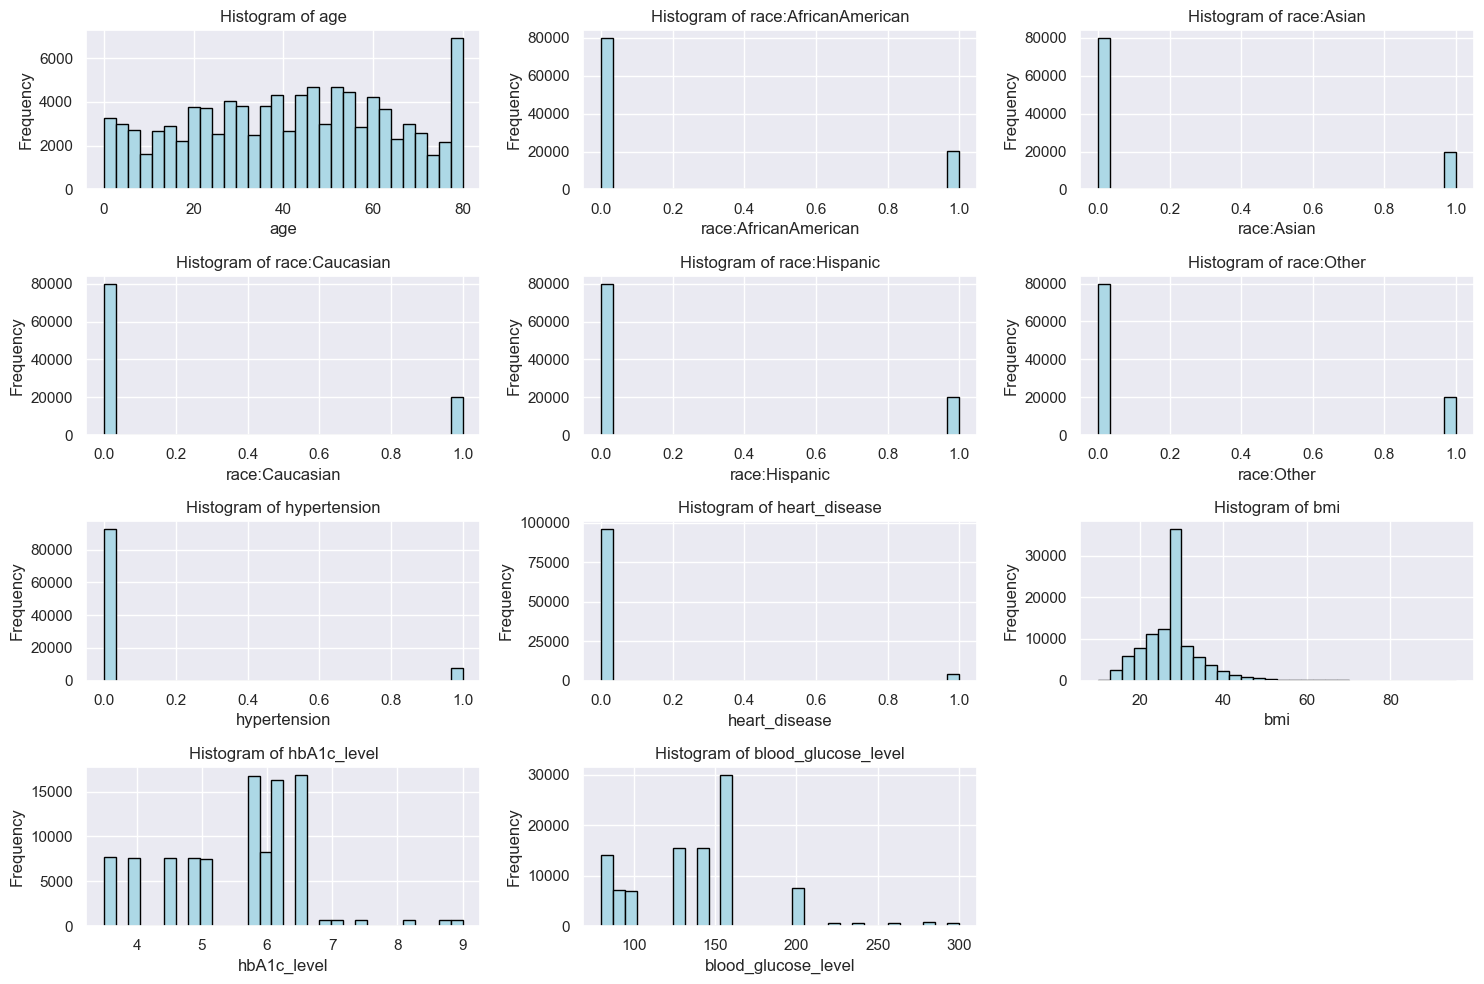

In [11]:
print(data[['age','race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level']].skew())

# Plot histograms for each column
columns =['age','race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'bmi',
       'hbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # 2 rows, 3 columns of plots
    plt.hist(data[col], bins=30, color='lightblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
data['box_bmi'], _ = boxcox(data['bmi'])
plt.hist(data['box_bmi'], bins=30, color='lightblue', edgecolor='black')
data['box_bmi'].skew()

np.float64(0.011380830869457913)

In [13]:
data['box_blood_glucose_level'], _ = boxcox(data['blood_glucose_level'])
plt.hist(data['box_blood_glucose_level'], bins=30, color='lightblue', edgecolor='black')
data['box_blood_glucose_level'].skew()

np.float64(-0.003734894840755916)

In [14]:
data_cleaned = data.drop(['blood_glucose_level','bmi'],axis='columns')

In [15]:
le_gender = LabelEncoder()
le_location = LabelEncoder()

le_smoking_history  = LabelEncoder()

data_cleaned['Gender'] = le_gender.fit_transform(data_cleaned['gender'])
data_cleaned['Location'] = le_location.fit_transform(data_cleaned['location'])
data_cleaned['Smoking_History'] = le_smoking_history.fit_transform(data_cleaned['smoking_history'])

In [16]:
data_cleaned = data_cleaned.drop(['gender','location','smoking_history'],axis='columns')

In [17]:
data_cleaned.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,hbA1c_level,diabetes,box_bmi,box_blood_glucose_level,Gender,Location,Smoking_History
0,2020,32.0,0,0,0,0,1,0,0,5.0,0,4.210856,6.367005,0,0,4
1,2015,29.0,0,1,0,0,0,0,0,5.0,0,3.721291,6.173231,0,0,4
2,2015,18.0,0,0,0,0,1,0,0,4.8,0,3.990775,7.265480,1,0,4
3,2015,41.0,0,0,1,0,0,0,0,4.0,0,4.210856,7.253119,1,0,4
4,2016,52.0,1,0,0,0,0,0,0,6.5,0,3.990118,6.173231,0,0,4


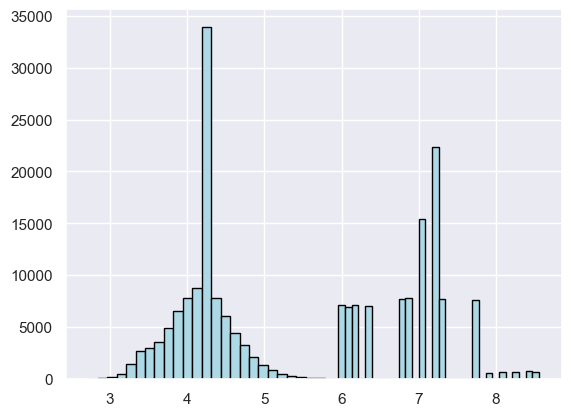

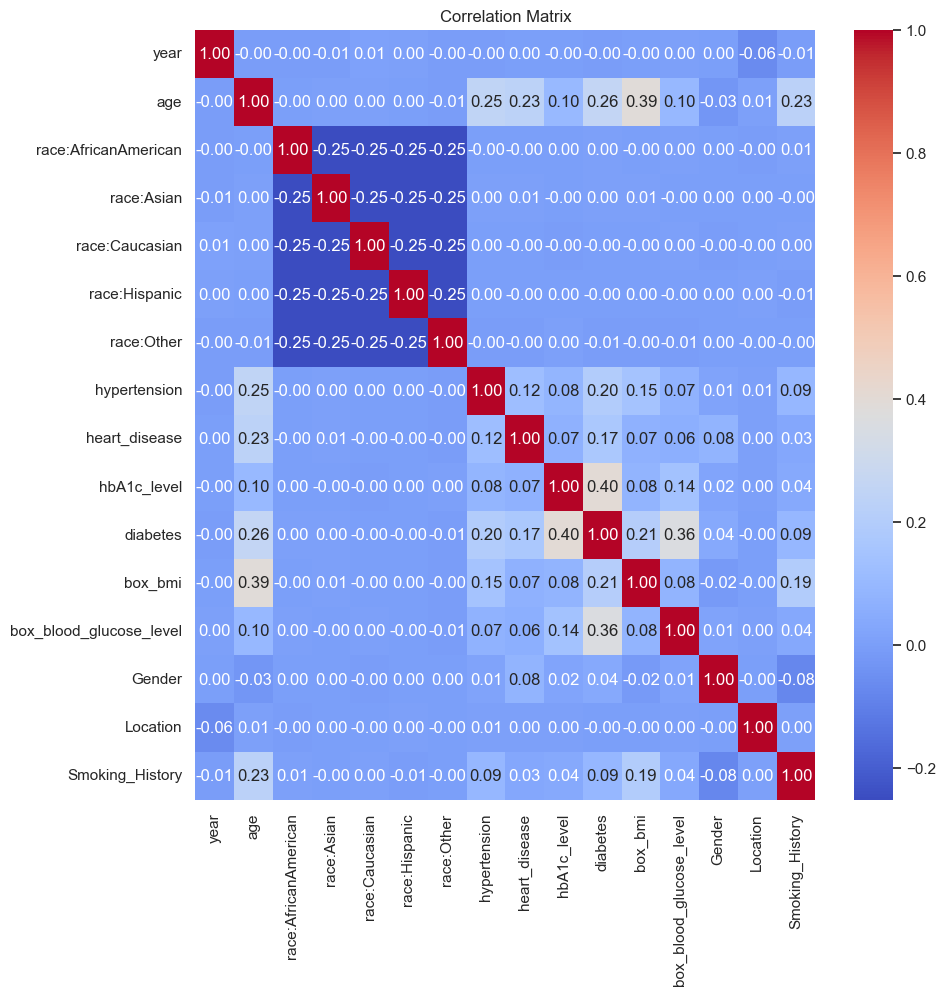

In [18]:
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
columns = ['age','hypertension', 'heart_disease','hbA1c_level','box_blood_glucose_level','box_bmi','Smoking_History','diabetes']

df=pd.DataFrame(data_cleaned[columns])
df.head()

,age,hypertension,heart_disease,hbA1c_level,box_blood_glucose_level,box_bmi,Smoking_History,diabetes
0,32.0,0,0,5.0,6.367005,4.210856,4,0
1,29.0,0,0,5.0,6.173231,3.721291,4,0
2,18.0,0,0,4.8,7.265480,3.990775,4,0
3,41.0,0,0,4.0,7.253119,4.210856,4,0
4,52.0,0,0,6.5,6.173231,3.990118,4,0


In [20]:
y = df['diabetes'].to_numpy()
X = df.copy()
X = df.drop(columns=['diabetes'], axis=1)
X1 = sm.add_constant(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X1 , y, test_size = 0.1, random_state = 1)
print(X_train, y_train)
print(X_test, y_test)

       const   age  hypertension  heart_disease  hbA1c_level  \
61010    1.0  13.0             0              0          6.5   
77750    1.0  77.0             0              1          4.0   
91401    1.0  80.0             0              0          6.1   
42871    1.0  80.0             0              0          5.8   
16411    1.0  14.0             0              0          5.0   
...      ...   ...           ...            ...          ...   
50057    1.0  38.0             0              0          5.8   
98047    1.0  53.0             0              0          3.5   
5192     1.0  76.0             0              0          6.0   
77708    1.0  45.0             0              0          5.8   
98539    1.0  70.0             0              1          5.8   

       box_blood_glucose_level   box_bmi  Smoking_History  
61010                 7.712244  4.210856                0  
77750                 5.959822  4.606017                0  
91401                 7.712244  4.210856           

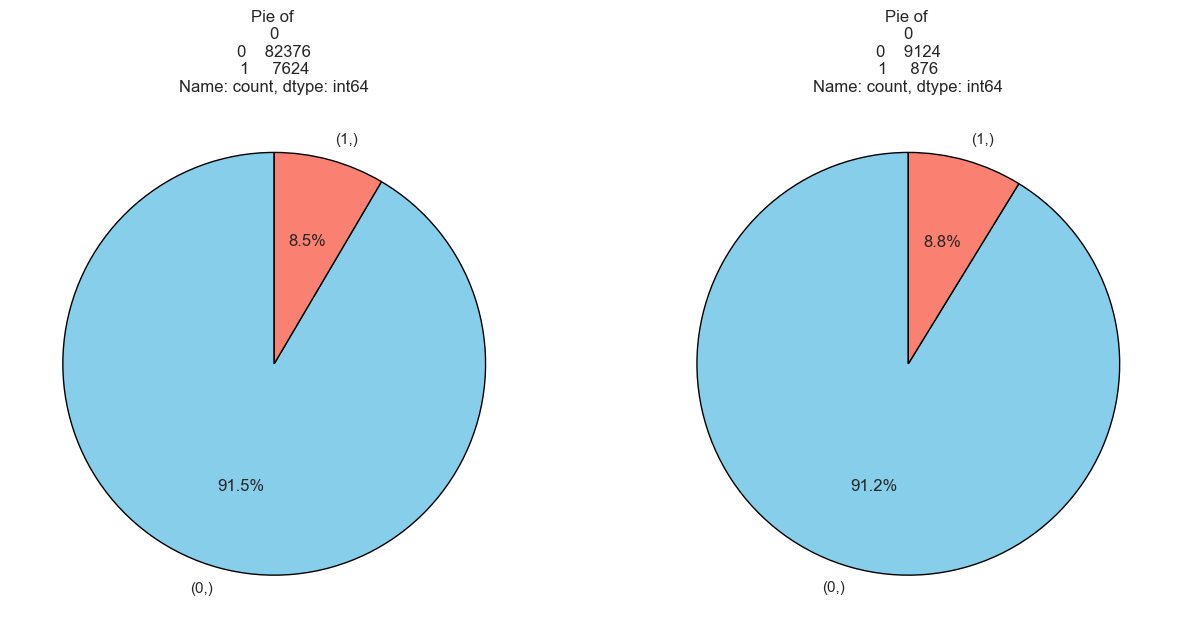

In [22]:
# Assuming data_original is your DataFrame and 'response' is the column
counts = [pd.DataFrame(y_train).value_counts(), pd.DataFrame(y_test).value_counts()]

# Create a pie chart

# Adding a title
plt.figure(figsize=(15, 10))
# Display the plot

for i, col in enumerate(counts, 1):
    plt.subplot(1, 2, i)  # 2 rows, 3 columns of plots
    plt.pie(col, labels=col.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Pie of \n{col}')
plt.show()


## Logistic Regression

In [89]:
# Initialize logistic regression model fit the data
log_reg = sm.Logit(y_train, X_train).fit() 

Optimization terminated successfully.
         Current function value: 0.114512
         Iterations 10


In [90]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                90000
Model:                          Logit   Df Residuals:                    89992
Method:                           MLE   Df Model:                            7
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.6053
Time:                        07:35:38   Log-Likelihood:                -10306.
converged:                       True   LL-Null:                       -26111.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -47.6372      0.530    -89.858      0.000     -48.676     -46.598
age                         0.0444      0.001     38.925      0.000       0.042       0.047


In [91]:
y_hat = log_reg.predict(X_test)
prediction = list(map(round, y_hat))

In [92]:
# confusion matrix
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))
print('Test precison = ', precision_score(y_test, prediction))
print('Test recall = ', recall_score(y_test, prediction))

Confusion Matrix : 
 [[9041   83]
 [ 349  527]]
Test accuracy =  0.9568
Test precison =  0.8639344262295082
Test recall =  0.6015981735159818


## Neural Network

In [32]:
from imblearn.combine import SMOTEENN

# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [33]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X_resampled , y_resampled, test_size = 0.2, stratify=y_resampled, random_state = 2)
print(X_train_str, y_train_str)
print(X_test_str, y_test_str)

        const   age  hypertension  heart_disease  hbA1c_level  \
129542    1.0  67.0             1              0     6.662723   
146387    1.0  66.0             0              0     8.884279   
45613     1.0   7.0             0              0     6.200000   
46399     1.0  38.0             0              0     4.500000   
108496    1.0  70.0             0              0     7.152434   
...       ...   ...           ...            ...          ...   
99250     1.0  74.0             1              0     6.642261   
39598     1.0   5.0             0              0     4.800000   
35395     1.0  51.0             0              0     5.800000   
17598     1.0  61.0             0              0     4.800000   
40353     1.0  39.0             0              0     6.600000   

        box_blood_glucose_level   box_bmi  Smoking_History  
129542                 7.212654  4.489540                4  
146387                 7.907173  4.362498                4  
45613                  6.069247  3.3

In [97]:
# Create the model
model = Sequential([
    Dense(64, activation='tanh', input_shape=(X_train.shape[1],)), # Input layer
    Dense(32, activation='relu'),                                  # Hidden layer
    Dense(64, activation='softmax'),                                # Hidden layer
    Dense(pd.DataFrame(y_train).shape[1], activation='sigmoid')     # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = "binary_crossentropy", #sparse_categorical_crossentropy, mean_squared_error, binary_crossentropy
              metrics=['accuracy'])
epochs = 15
model_fit = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9100 - loss: 0.4137 - val_accuracy: 0.9179 - val_loss: 0.2848
Epoch 2/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9160 - loss: 0.2888 - val_accuracy: 0.9179 - val_loss: 0.2841
Epoch 3/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9139 - loss: 0.2931 - val_accuracy: 0.9179 - val_loss: 0.2410
Epoch 4/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.2262 - val_accuracy: 0.9404 - val_loss: 0.1903
Epoch 5/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9386 - loss: 0.1873 - val_accuracy: 0.9376 - val_loss: 0.1721
Epoch 6/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9420 - loss: 0.1669 - val_accuracy: 0.9382 - val_loss: 0.1875
Epoch 7/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1497 - val_accuracy: 0.9485 - val_loss: 0.1405
Epoch 8/15
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9512 - loss: 0.1394 - 

In [100]:
y_hat = model.predict(X_test)
y_hat = [1 if p >= 0.5 else 0 for p in y_hat]
print(sum(y_hat), len(y_hat)-sum(y_hat))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
544 9456


In [101]:
# confusion matrix
cm = confusion_matrix(y_test, y_hat)  
print ("Confusion Matrix : \n", cm)  
  
# Evaluate the model
print('Test accuracy = ', accuracy_score(y_test, y_hat))
print('Test precison = ', precision_score(y_test, y_hat))
print('Test recall = ', recall_score(y_test, y_hat))

Confusion Matrix : 
 [[9073   51]
 [ 383  493]]
Test accuracy =  0.9566
Test precison =  0.90625
Test recall =  0.5627853881278538


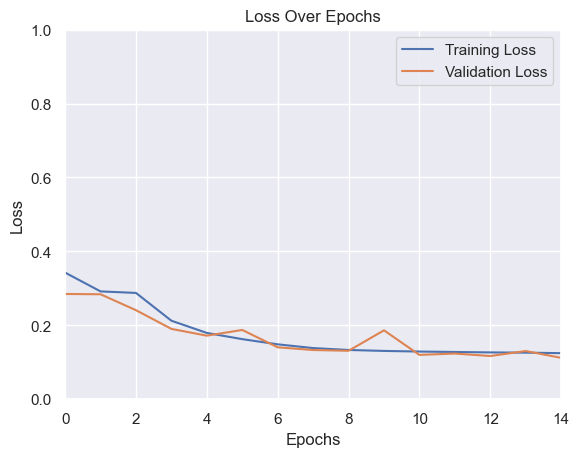

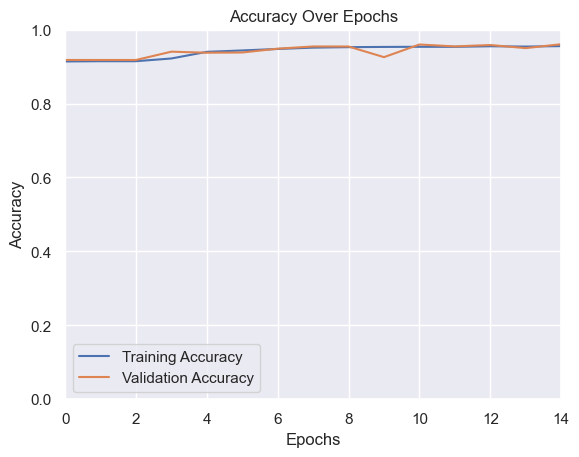

In [102]:
# Plot loss
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(0,epochs-1)
plt.ylim(0,1)
plt.show()

# Plot accuracy
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,epochs-1)
plt.ylim(0,1)
plt.show()

## Decision Tree

In [93]:
# Create the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state = 42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [94]:
# Predict on the test data
y_hat = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)  

print ("Confusion Matrix : \n", cm) 
# Evaluate the model
print('Test accuracy = ', accuracy_score(y_test, y_hat))
print('Test precison = ', precision_score(y_test, y_hat))
print('Test recall = ', recall_score(y_test, y_hat))

Confusion Matrix : 
 [[9124    0]
 [ 331  545]]
Test accuracy =  0.9669
Test precison =  1.0
Test recall =  0.6221461187214612


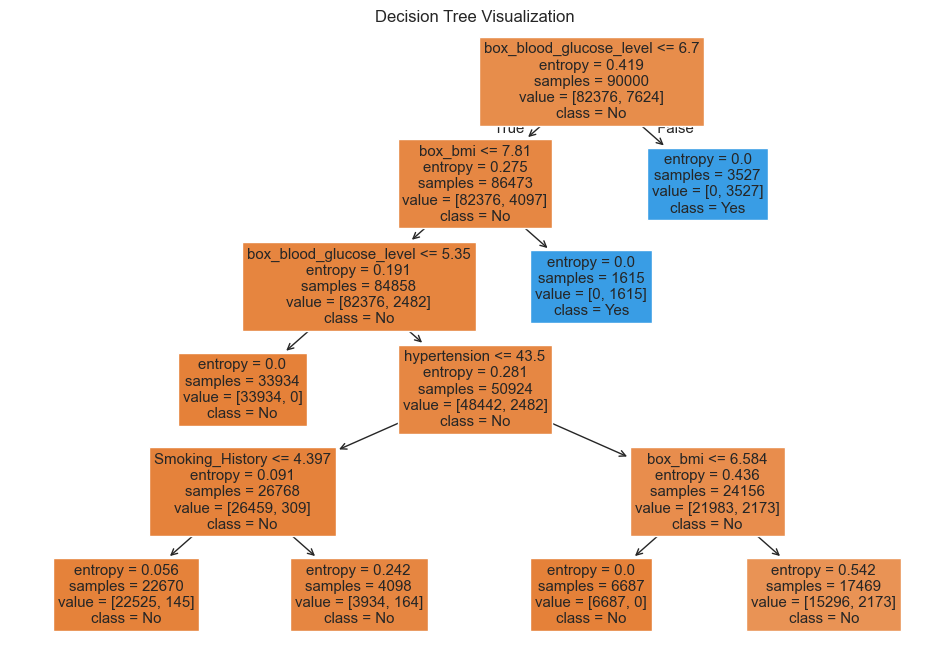

In [29]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names= df.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [95]:
# Create the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 10, random_state = 42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [96]:
# Predict on the test data
y_hat = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)  

print ("Confusion Matrix : \n", cm) 
# Evaluate the model
print('Test accuracy = ', accuracy_score(y_test, y_hat))
print('Test precison = ', precision_score(y_test, y_hat))
print('Test recall = ', recall_score(y_test, y_hat))

Confusion Matrix : 
 [[9123    1]
 [ 331  545]]
Test accuracy =  0.9668
Test precison =  0.9981684981684982
Test recall =  0.6221461187214612
